In [1]:
import GetOldTweets3 as got
import datetime
import time
from random import uniform
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def day():
    global days_range
    days_range = []
    start_input = input()
    end_input = input()
    start = datetime.datetime.strptime(start_input, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_input, "%Y-%m-%d")
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    
    for date in date_generated:
        days_range.append(date.strftime("%Y-%m-%d"))
        
    print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
    print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

In [3]:
def tweetCriteria():
    global tweet
    
    # 수집 기간 맞추기
    start_date = days_range[0]
    end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d")
               + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    
    # 트윗 수집 기준 정의
    search_input = input()
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(search_input)\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)
    print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
    start_time = time.time()
    
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    
    # 수집 wirh GetOldTweet3
    print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
    print("=== Total num of tweets is {} ===".format(len(tweet)))

In [12]:
# 변수 저장하기
# 유저 아이디, 트윗 링크, 트윗 내용, 날짜, 리트윗 수, 관심글 수 수집 가능
# 원하는 변수 골라서 저장하기
def crawling():
    #initialize
    global tweet_list
    tweet_list = []
    
    for index in tqdm_notebook(tweet):
        # 메타데이터 목록
        # username = index.username
        # link = index.permalink 
        content = index.text
        tweet_date = index.date.strftime("%Y-%m-%d")
        # tweet_time = index.date.strftime("%H:%M:%S")
        # retweets = index.retweets
        # favorites = index.favorites
        
        # 결과 합치기
        info_list = [tweet_date, content]
        tweet_list.append(info_list)
        
        # 휴식
        time.sleep(uniform(1,2))

In [13]:
day()
tweetCriteria()
crawling()

2019-08-07
2019-08-17
=== 설정된 트윗 수집 기간은 2019-08-07 에서 2019-08-16 까지 입니다 ===
=== 총 10일 간의 데이터 수집 ===
유미의세포들
=== Total num of tweets is 112 ===


In [6]:
import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "text"])

twitter_df

,date,text
0,2019-08-16,유미의 세포들 웹툰을 처음으로 정주행 연애가 이렇게 어려운 거였어..?
1,2019-08-16,독자들이 덧글로 아무리 떠들어봤자 미래는 작가만 안다.. 나는 바비랑 그렇게 해어질...
2,2019-08-16,유미의세포들 베댓 ㄹㅇ레전드ㅋㅋ pic.twitter.com/u1BmaTY1R1
3,2019-08-16,약간유미의세포들에 유미의세포들처럼... 쥔공씨하고시픈거다해~~~~~
4,2019-08-16,유미의 세포들 베댓보면 남캐 진짜 좋아하는것 같음...ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
5,2019-08-16,유미의 세포들 리듬게임에 터마바가 나왔다는 소리듣고 깔았는데 터마바가 랭킹 1위야 ...
6,2019-08-16,유미의 세포들 ㅋㅋㅋㅋ 다정함이라니 생각도 못한 아이가 있네요 고마어요
7,2019-08-16,@Yumchoii 유미의 세포들 다정함 인장 귀욥
8,2019-08-16,"이어서22 걸어서 30분, 화장 지워주는 남자, 개를 낳았다, 난약, 내 여자친구는..."
9,2019-08-16,"이어서 꿀벌과 아카시아, 타인은 지옥이다, 유미의 세포들, 연놈, 세상은 돈과 권력..."


2019-08-07    14
2019-08-08    12
2019-08-09    15
2019-08-10    10
2019-08-11     9
2019-08-12     7
2019-08-13    14
2019-08-14    12
2019-08-15     6
2019-08-16    14
Name: date, dtype: int64


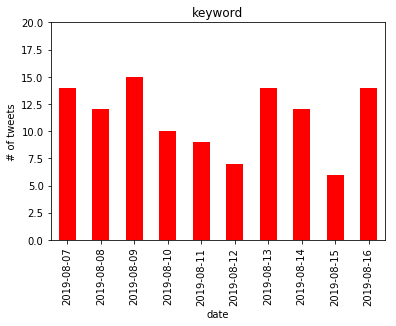

In [9]:
# 데이터 통계 확인
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    text = dataframe["text"].lower()
    if "유미의 세포들" in text:
        keywords.append("유미의 세포들")
    if "윰세" in text:
        keywords.append("윰세")
    if "유바비" in text:
        keywords.append("유바비")
    if "구웅" in text:
        keywords.append("구웅")
    return ",".join(keywords)

twitter_df["keyword"] = twitter_df.apply(get_keywords, axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = twitter_df["date"].value_counts().sort_index()

plt.title("keyword")
plt.ylabel("# of tweets")
plt.xlabel("date")
plt.ylim(0,20)
counts.plot(kind = 'bar', color='red')
print(counts)